In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import dct, idct

In [2]:
def dct2(img):
    return dct(dct(img.T).T)

In [3]:
def idct2(img):
    return idct(idct(img.T).T)

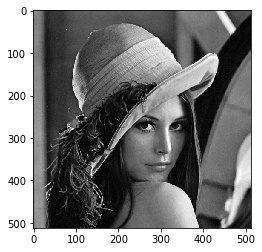

In [4]:
img = imageio.imread('Lena.png')[:,:,0]
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
def bdct2(img):
    h, w = img.shape
    result = np.zeros((h, w))

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            result[i:(i+8),j:(j+8)] = dct2(img[i:(i+8),j:(j+8)])
    return result

In [9]:
def ibdct2(img):
    h, w = img.shape
    result = np.zeros((h, w))

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            result[i:(i+8),j:(j+8)] = idct2(img[i:(i+8),j:(j+8)])
    return result

In [13]:
def get_fn(img):
    h, w = img.shape
    f = bdct2(img)
    fn = np.zeros((h, w))
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            fn[i,j] = f[i,j]
            fn[i,j+1] = f[i,j+1]
            fn[i+1,j] = f[i+1,j]
    return fn   

In [22]:
fn = get_fn(img)
Fn = ibdct2(fn)
F = img
E = F - Fn
np.around(bdct2(img))

array([[ 3.5644e+04,  6.6000e+01, -1.2800e+02, ..., -5.7000e+01,
         1.7000e+01, -9.0000e+00],
       [ 6.6000e+01, -6.5000e+01, -1.4000e+01, ...,  3.5000e+01,
        -8.0000e+00,  3.0000e+00],
       [ 2.1000e+01,  8.0000e+00,  7.2000e+01, ..., -1.1000e+01,
         5.0000e+00, -1.0000e+00],
       ...,
       [-3.8000e+01,  7.1000e+01, -1.6000e+01, ..., -8.0000e+00,
         2.0000e+00,  1.0000e+00],
       [-8.8000e+01,  6.6000e+01, -7.0000e+00, ..., -8.0000e+00,
        -3.0000e+00, -1.3000e+01],
       [-6.0000e+00, -7.5000e+01, -1.4000e+01, ..., -1.6000e+01,
        -9.0000e+00, -1.5000e+01]])